In [1]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
from MLP import *
import pandas as pd

<h2>FASHION MNIST DATASET

<h3>Preparing Data

In [12]:
X = idx2numpy.convert_from_file('Fashion MNIST/train-images-idx3-ubyte')
Y = idx2numpy.convert_from_file('Fashion MNIST/train-labels-idx1-ubyte')
X1, Y1 = dataloader(X, Y)
X_train, Y_train = batchloader(X1, Y1, batch_size = 60000)
len(X_train), len(Y_train), X_train[0].shape, Y_train[0].shape

(1, 1, (784, 60000), (10, 60000))

In [3]:
X = idx2numpy.convert_from_file('Fashion MNIST/t10k-images-idx3-ubyte')
Y = idx2numpy.convert_from_file('Fashion MNIST/t10k-labels-idx1-ubyte')
X1, Y1 = dataloader(X, Y)
X_test, Y_test = batchloader(X1, Y1, 10000)
len(X_test), len(Y_test), X_test[0].shape, Y_test[0].shape

(1, 1, (784, 10000), (10, 10000))

<h3>Building Network

In [4]:
network = [
    Linear(784, 256),
    sigmoid(),
    Linear(256, 128),
    sigmoid(),
    Linear(128, 10),
    softmax()    
]

In [5]:
nn = NeuralNetwork(network)

In [6]:
network

<h3>Training Network

Error at Epoch 1 is 0.052583395928168165
Error at Epoch 2 is 0.04316701664302589
Error at Epoch 3 is 0.03771099418698857
Error at Epoch 4 is 0.03116907670197559
Error at Epoch 5 is 0.02682141504032487
Error at Epoch 6 is 0.023941783811521178
Error at Epoch 7 is 0.022679777729582223
Error at Epoch 8 is 0.021662709585783195
Error at Epoch 9 is 0.02073997398578262
Error at Epoch 10 is 0.020268578510875324
Error at Epoch 11 is 0.01980275306110397
Error at Epoch 12 is 0.019385450944677435
Error at Epoch 13 is 0.019049099826337883
Error at Epoch 14 is 0.018686763128402565
Error at Epoch 15 is 0.01824732245526505
Error at Epoch 16 is 0.017844550064980303
Error at Epoch 17 is 0.017454475136484043
Error at Epoch 18 is 0.0170320500649254
Error at Epoch 19 is 0.016535007121857737
Error at Epoch 20 is 0.015938194160708317
Error at Epoch 21 is 0.01524819420124664
Error at Epoch 22 is 0.014526460677239002
Error at Epoch 23 is 0.013837319926510643
Error at Epoch 24 is 0.013225648135526619
Error at Ep

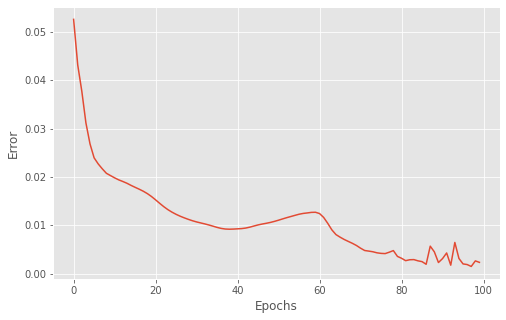

Wall time: 12min 36s


In [7]:
%%time
filename = r"Output\Models\GD-lr-0.9-sig-sig"
trainNetwork(nn, X_train, Y_train , epoch = 201, lr = 0.00005 , momentum = 0, beta = 0.9, gamma = 0.99,
             optimiser = "Adam", filename= filename, save = False)

In [8]:
print("Accuracy of the Network: ", nn.predict(X_train[5], Y_train[5]))

Accuracy of the Network:  98.4375


<h3>Testing Network

In [10]:
filename = r"Output\Models\GD-lr-0.9-sig-sig"
model = nn.load_state_dict(f"{filename}.pkl")
test = NeuralNetwork(model)
print("Accuracy of the Network: ", test.predict(X_test[0], Y_test[0]))

Accuracy of the Network:  75.92


In [3]:
df = pd.read_excel(r"Output\Neural Network Gradient Descent Training and Testing Accuracy.xlsx", index_col = 0)
df

,Model,Training Accuracy,Testing Accuracy
0,GD-lr-0.05-ReLu,73.513333,72.37
1,GD-lr-0.05-tanh-tanh,59.705000,57.03
2,GD-lr-0.1-tanh-sig,61.428333,60.46
3,GD-lr-0.2-ReLu,73.980000,72.77
4,GD-lr-0.2-sig-sig,72.723333,71.83
5,GD-lr-0.5-ReLu,67.973333,67.59
6,GD-lr-0.5-sig-sig,73.896667,72.55
7,GD-lr-0.5-tanh-sig,74.518333,71.66
8,GD-lr-0.5-tanh-tanh,75.796667,70.53
9,GD-lr-0.9-sig-sig,77.253333,75.92


In [14]:
# Showing Models Accuracy

import os
for filename in os.listdir("Output\Models"):
    print(filename[:-4])
    model = nn.load_state_dict(os.path.join("Output\Models" , filename))
    test = NeuralNetwork(model)
    print("Test Accuracy of the Network: ", test.predict(X_test[0], Y_test[0]))
    print("Train Accuracy of the Network: ", test.predict(X_train[0], Y_train[0]))
    print("\n")

AdaGrad-0.0005-sig-sig
Test Accuracy of the Network:  73.9
Train Accuracy of the Network:  74.99666666666667


Adam-0.0005-sig-sig
Test Accuracy of the Network:  85.77
Train Accuracy of the Network:  97.165


GD-lr-0.05-ReLu
Test Accuracy of the Network:  72.37
Train Accuracy of the Network:  73.51333333333334


GD-lr-0.9-sig-sig
Test Accuracy of the Network:  75.92
Train Accuracy of the Network:  77.25333333333333


GD-lr-1-tanh-sig
Test Accuracy of the Network:  73.82
Train Accuracy of the Network:  76.465


Momentum-0.0005-sig-sig
Test Accuracy of the Network:  70.41
Train Accuracy of the Network:  71.07


NAG-0.0005-sig-sig
Test Accuracy of the Network:  70.01
Train Accuracy of the Network:  70.92666666666666


RMSProp-0.0005-sig-sig
Test Accuracy of the Network:  86.08
Train Accuracy of the Network:  96.49666666666667




In [15]:
df = pd.read_excel(r"Output\Neural Network  Training and Testing Accuracy with different optimizers.xlsx", index_col = 0)
df

,Model,Training Accuracy,Testing Accuracy
0,Adam,97.17,85.77
1,Adagrad,75.00,73.90
2,RMSProp,96.50,86.08
3,Momentum SGD,71.07,70.41
4,NAG,71.00,70.01
